# Creating a Lollipop Plot with plotnine

This tutorial aims to educate Python users on how to create a segment or lollipop plot using the plotnine package. Similar to a barplot, the lollipop plot uses lines and dots to represent categories and their counts, providing a clear and concise visual representation of the data.

## Getting Started
First, I will load the necessary libraries and custom functions for this tutorial.

I will load polars and polars.selectors for working with columns, plotnine for creating the plot, label_number for formatting plot labels, textwrap for formatting texts, and censuspy for cleaning and transforming the South Sudan 2008 census dataset. censuspy is a module containing my custom functions.

In [145]:
# Loading Libraries
import polars as pl
import polars.selectors as cs
from plotnine import *
from mizani.labels import label_number

# Let's import our custom function censuspy as cy
import censuspy as cy
import textwrap

# Display libraries and system versions
import sys 
import plotnine as p9

print(f'My system version is {sys.version};\nPolars version is {pl.__version__}\nplotnine version is {p9.__version__}.')

My system version is 3.12.4 (main, Jun  6 2024, 18:26:44) [Clang 15.0.0 (clang-1500.3.9.4)];
Polars version is 1.1.0
plotnine version is 0.13.6.post27+g6bf7fe7.
My system version is 3.12.4 (main, Jun  6 2024, 18:26:44) [Clang 15.0.0 (clang-1500.3.9.4)];
Polars version is 1.1.0
plotnine version is 0.13.6.post27+g6bf7fe7.


### Loading the Dataset
In this section, I will import the South Sudan census dataset using pl.read_csv() and inspect the output. Next, I will clean and transform the data using the tweak_census() function from the censuspy module. For this tutorial, I will group the data by "age category", remove unwanted rows, and add a labels column accordingly.

In [68]:
# Load the load
url = 'https://raw.githubusercontent.com/tongakuot/python_tutorials/main/00_data/ss_2008_census_data_raw.csv'

# Tell polars how to label missing values
census_raw = pl.read_csv(url, null_values='NA')

# Inspect the data
print(census_raw.head())

shape: (5, 10)
┌────────┬─────────┬─────────┬─────────┬───┬─────────┬───────┬────────┬────────┐
│ Region ┆ Region  ┆ Region  ┆ Variabl ┆ … ┆ Age     ┆ Scale ┆ Units  ┆ 2008   │
│ ---    ┆ Name    ┆ - Regio ┆ e       ┆   ┆ Name    ┆ ---   ┆ ---    ┆ ---    │
│ str    ┆ ---     ┆ nId     ┆ ---     ┆   ┆ ---     ┆ str   ┆ str    ┆ i64    │
│        ┆ str     ┆ ---     ┆ str     ┆   ┆ str     ┆       ┆        ┆        │
│        ┆         ┆ str     ┆         ┆   ┆         ┆       ┆        ┆        │
╞════════╪═════════╪═════════╪═════════╪═══╪═════════╪═══════╪════════╪════════╡
│ KN.A2  ┆ Upper   ┆ SS-NU   ┆ KN.B2   ┆ … ┆ Total   ┆ units ┆ Person ┆ 964353 │
│        ┆ Nile    ┆         ┆         ┆   ┆         ┆       ┆ s      ┆        │
│ KN.A2  ┆ Upper   ┆ SS-NU   ┆ KN.B2   ┆ … ┆ 0 to 4  ┆ units ┆ Person ┆ 150872 │
│        ┆ Nile    ┆         ┆         ┆   ┆         ┆       ┆ s      ┆        │
│ KN.A2  ┆ Upper   ┆ SS-NU   ┆ KN.B2   ┆ … ┆ 5 to 9  ┆ units ┆ Person ┆ 151467 │
│        ┆ Ni

In [3]:
# Group by and summarization
census = (
    cy.tweak_census(
    census_raw, 
    grouping_cols='category', 
    condition=~((pl.col('gender') == 'Total') | (pl.col('category') == 'Total')) 
    )
    .with_columns(labels=(pl.col('total') / 1000000).round(2))
)

# inspect the first 5 rows
print(census)

shape: (7, 3)
┌──────────────┬─────────┬────────┐
│ category     ┆ total   ┆ labels │
│ ---          ┆ ---     ┆ ---    │
│ str          ┆ i64     ┆ f64    │
╞══════════════╪═════════╪════════╡
│ 0-14         ┆ 3659337 ┆ 3.66   │
│ 15-24        ┆ 1628835 ┆ 1.63   │
│ 25-34        ┆ 1234926 ┆ 1.23   │
│ 35-44        ┆ 815517  ┆ 0.82   │
│ 45-54        ┆ 473365  ┆ 0.47   │
│ 55-64        ┆ 237426  ┆ 0.24   │
│ 65 and above ┆ 211084  ┆ 0.21   │
└──────────────┴─────────┴────────┘
shape: (7, 3)
┌──────────────┬─────────┬────────┐
│ category     ┆ total   ┆ labels │
│ ---          ┆ ---     ┆ ---    │
│ str          ┆ i64     ┆ f64    │
╞══════════════╪═════════╪════════╡
│ 0-14         ┆ 3659337 ┆ 3.66   │
│ 15-24        ┆ 1628835 ┆ 1.63   │
│ 25-34        ┆ 1234926 ┆ 1.23   │
│ 35-44        ┆ 815517  ┆ 0.82   │
│ 45-54        ┆ 473365  ┆ 0.47   │
│ 55-64        ┆ 237426  ┆ 0.24   │
│ 65 and above ┆ 211084  ┆ 0.21   │
└──────────────┴─────────┴────────┘


## Plotting Census Data by Age Category
In this section, I will plot census data by age category using the `plotnine` library. The visualization depicts the demographic distribution based on age categories in South Sudan's 2008 census. 

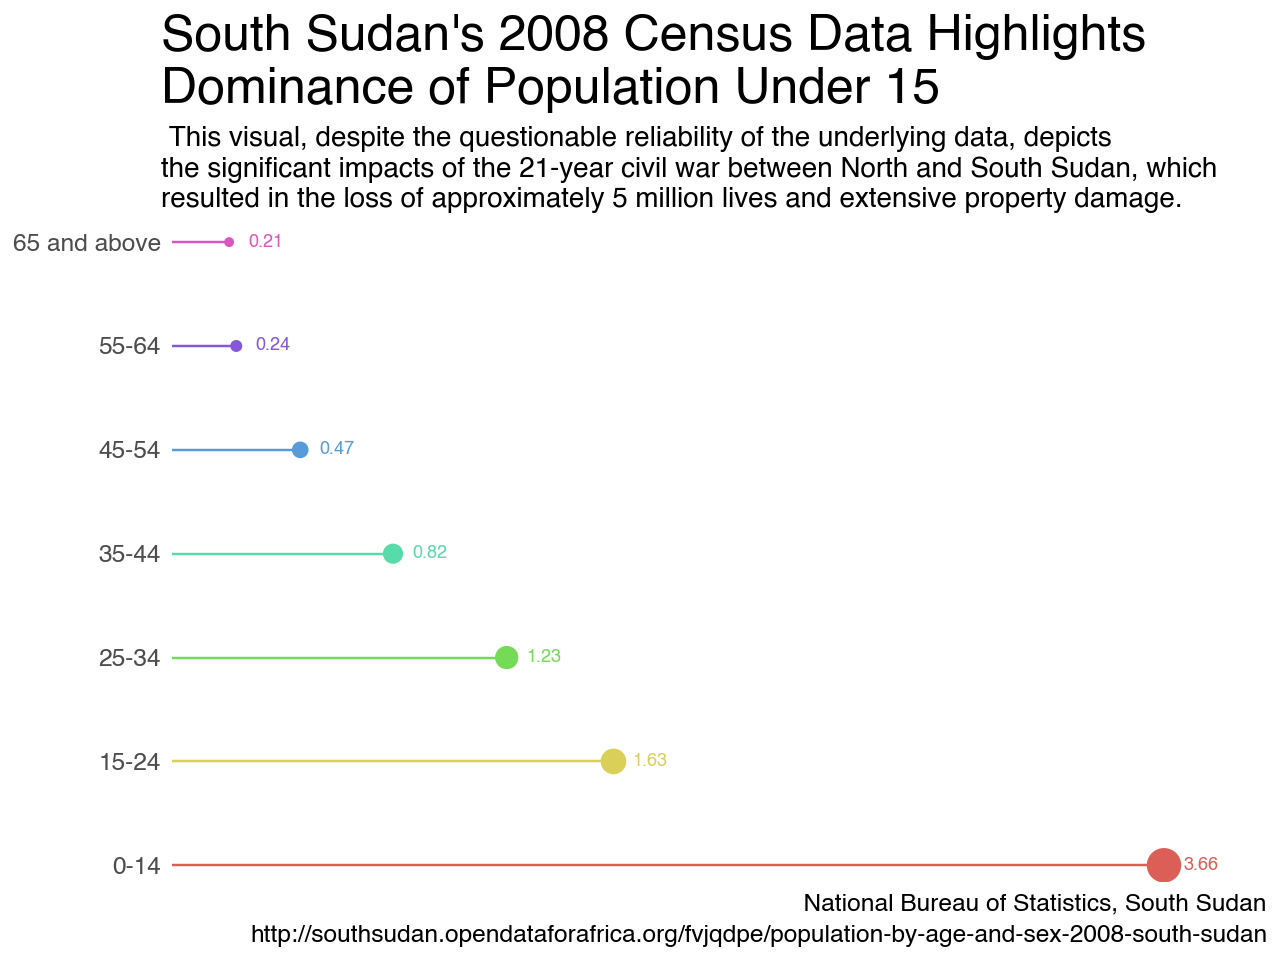

In [143]:
# Plotting a lollipop plot with plotnine library
caption_1 = '{:>124}'.format('National Bureau of Statistics, South Sudan')
caption_2 = 'http://southsudan.opendataforafrica.org/fvjqdpe/population-by-age-and-sex-2008-south-sudan'
subtitle_text = """
This visual, despite the questionable reliability of the underlying data, depicts the significant impacts of the 21-year civil war between North and South Sudan, which resulted in the loss of approximately 5 million lives and extensive property damage.
"""

(
    ggplot(census, aes('total', 'category'))
    + geom_segment(aes(y='category', yend='category', x=0, xend='total', color='category'), show_legend=False)    
    + geom_point(aes(size='total', fill='category', color='category'), show_legend=False)
    + geom_text(aes(label='labels', color='category'), size=6.5, nudge_x=135_000, show_legend=False)
    + scale_x_continuous(
        labels=label_number(scale=1e-6, suffix='M'),
        expand=(0.01, 0.01),
        limits=(0, 4_000_000)
    )
    + scale_y_discrete(expand=(0.02, 0.04))
     + labs(
        x=None,
        y=None,
        title=textwrap.fill('South Sudan\'s 2008 Census Data Highlights Dominance of Population Under 15', width=50),
        subtitle=textwrap.fill(subtitle_text, width=85),
        caption=f'{caption_1}\n{caption_2}'
    )
    + theme(
        plot_title=element_text(
            ha='left', 
            size=18, 
            face='bold',
            lineheight=1.2
        ),        
        plot_subtitle=element_text(
            ha='left', 
            size=10, 
            face='bold',
            lineheight=1.2
        ),
        panel_grid_major_x=element_blank(),
        panel_grid_minor_x=element_blank(),        
        panel_grid_major_y=element_blank(),
        axis_text_x=element_blank(),
        axis_title=element_blank(),
        axis_ticks=element_blank(),
        panel_background=element_blank(),
        plot_caption=element_text(ha='right', lineheight=1.5)
    )
   
)

The code snippet above creates a lollipop plot using the `plotnine` library, where each line segment and dot represents a distinct age category from the South Sudan census data. This visualization highlights the predominance of the population under 15 years old, offering insights into the demographic composition shaped by the long-lasting civil war's impacts. The title and subtitle contextualize the plot, offering further understanding of the demographic trends depicted. Additionally, the caption credits the National Bureau of Statistics, South Sudan as the data source and provides a link for those interested in exploring more detailed information.

- `ggplot()` initializes a plot object with the census DataFrame using the 'total' column for x-axis (total count) and 'category' column for y-axis (age category).

- `geom_segment()` adds line segments to the plot, where each segment represents a category. Parameters specify the start (x=0, y='category') and end (xend='total', yend='category') coordinates of each segment, colored by category without a legend.
- `geom_point()` adds points to the plot, with each point sized according to 'total' and colored by 'category', again without a legend.
- `geom_text()` adds text labels to the plot, with labels taken from the 'labels' column, colored by 'category', and adjusted horizontally (nudge_x=135_000) to avoid overlap, without a legend.
- `scale_x_continuous()` adjusts the x-axis scale. It formats labels using label_number to scale numbers by 1 million with 'M' suffix, expands the scale by 1% on both sides, and limits the x-axis from 0 to 4,000,000.
- `scale_y_discrete()` adjusts the y-axis scale. It expands the categorical axis by 2% on the bottom and 4% on the top.
- `labs()` sets the plot labels and captions. It hides x and y axis labels (None), sets the plot title and subtitle (wrapped text), and includes a caption with caption_1 and caption_2.
- `theme()` customizes the plot appearance. It adjusts the title and subtitle text properties (plot_title and plot_subtitle), removes major and minor grid lines (panel_grid_major_x, panel_grid_minor_x, panel_grid_major_y), hides x-axis text (axis_text_x), axis titles (axis_title), ticks (axis_ticks), and background (panel_background). It also aligns the caption to the right (plot_caption).
- `lineheight`: adjusts the spacing between lines of text within a paragraph or title, ensuring proper readability and aesthetic spacing.
- `textwrap.fill()`: from the textwrap package, adjusts the width of text by specifying a maximum width (number of characters). This function automatically formats the text to wrap around to fit within the specified width, enhancing readability and presentation in plots, titles, or paragraphs.

# Polishing Our Plot
In this final section, I will enhance the plot for a more professional and appealing appearance. I will make the following modifications:

1) Add category labels as text labels to enhance readability.
2) Reintroduce x-axis text for clarity.
3) Highlight the category '0-14' in green to emphasize population growth, and change other categories' colors to grey for differentiation.
4) Remove y-axis text for a cleaner look.
5) Left-align both the title and subtitle for better presentation, which naturally results from removing the y-axis text. This adjustment enhances readability and visual appeal by ensuring consistent alignment of textual elements within the plot.

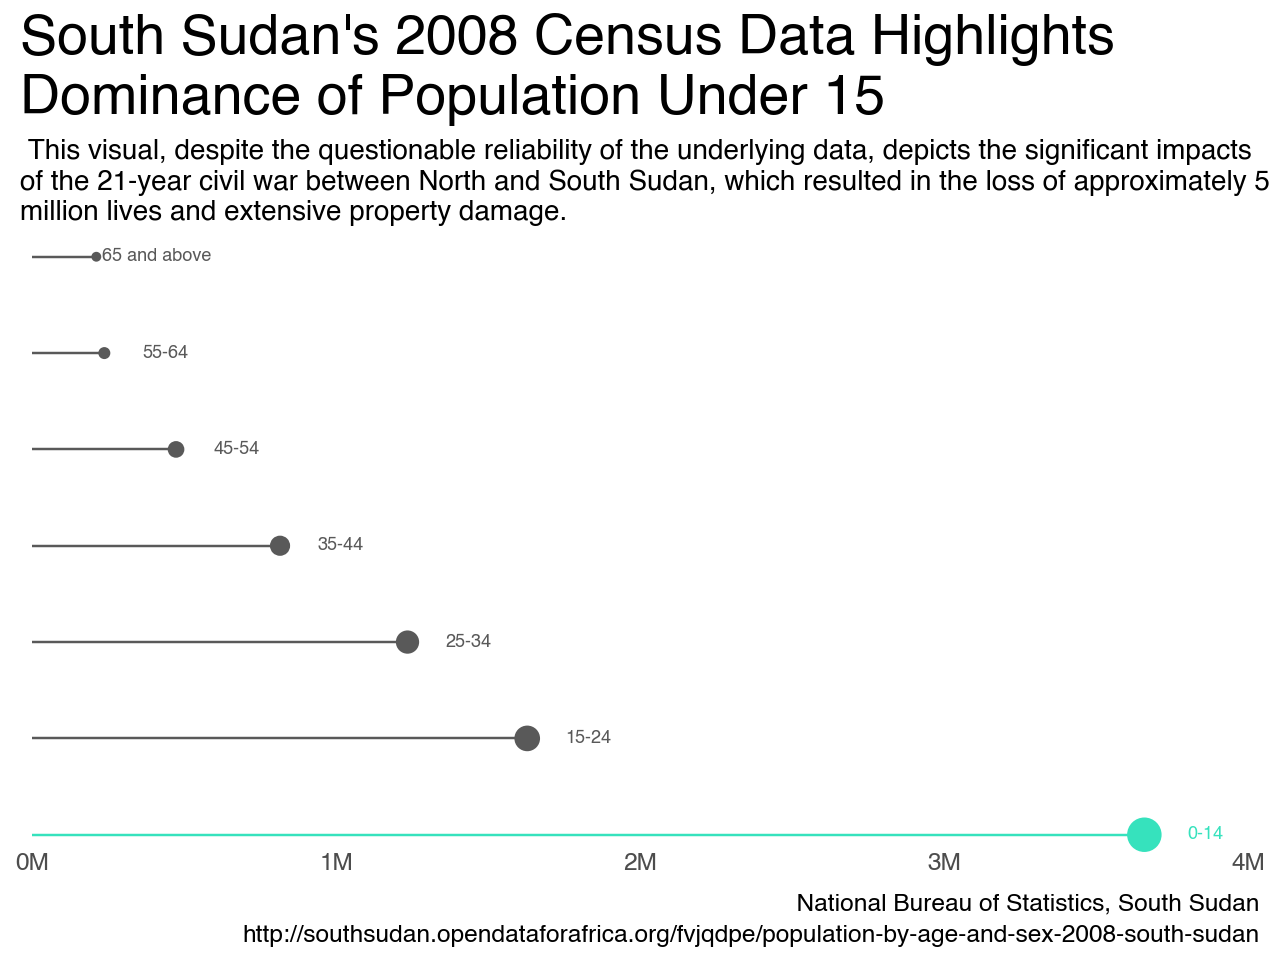

In [146]:
# Plotting a lollipop plot with plotnine library
caption_1 = '{:>124}'.format('National Bureau of Statistics, South Sudan')
caption_2 = 'http://southsudan.opendataforafrica.org/fvjqdpe/population-by-age-and-sex-2008-south-sudan'
subtitle_text = """
This visual, despite the questionable reliability of the underlying data, depicts the significant impacts of the 21-year civil war between North and South Sudan, which resulted in the loss of approximately 5 million lives and extensive property damage.
"""

(
    ggplot(census, aes('total', 'category', color='category'))
    + geom_segment(aes(y='category', yend='category', x=0, xend='total', color='category'), show_legend=False)
    + geom_point(aes(size='total', fill='category'), show_legend=False)
    + geom_text(aes(label='category', color='category'), size=6.5, nudge_x=200_000, show_legend=False)
    + scale_x_continuous(
        labels=label_number(scale=1e-6, suffix='M'),
        expand=(0.01, 0.01),
        limits=(0, 4_000_000)
    )
    + scale_fill_manual(values=['#36E2BD', '#595959', '#595959', '#595959', '#595959', '#595959', '#595959'], labels='category')
    + scale_color_manual(values=['#36E2BD', '#595959', '#595959', '#595959', '#595959', '#595959', '#595959'], labels='category')
    + scale_y_discrete(expand=(0.025, 0.04))
     + labs(
        x=None,
        y=None,
        title=textwrap.fill('South Sudan\'s 2008 Census Data Highlights Dominance of Population Under 15', width=50),
        subtitle=textwrap.fill(subtitle_text, width=107),
        caption=f'{caption_1}\n{caption_2}'
    )
    + theme(
        plot_title=element_text(
            ha='left', size=20, 
            face='bold',
            lineheight=1.2
        ),
        plot_subtitle=element_text(
            ha='left', 
            size=10, 
            face='bold',
            lineheight=1.2
        ),
        panel_grid_major_x=element_blank(),
        panel_grid_minor_x=element_blank(),        
        panel_grid_major_y=element_blank(),
        axis_text_y=element_blank(),
        axis_title=element_blank(),
        axis_ticks=element_blank(),
        panel_background=element_blank(),
        plot_caption=element_text(
            ha='right', 
            margin={'t': 15},
            lineheight=1.5
        )
    )
   
)

# Closing Remarks

In this tutorial, we've delved into the exploration of South Sudan's 2008 census data using a lollipop plot. Through this visual representation, we've uncovered insights into the demographic distribution, particularly highlighting the significant youth population under 15 years old in the aftermath of the country's civil war.

This visual exercise not only demonstrates the power of data visualization in uncovering insights but also serves as a practical example for Python users leveraging the plotnine library. By showcasing how to create and polish a lollipop plot, we've equipped Python enthusiasts with the skills to effectively communicate data-driven narratives. These skills are crucial in various fields, from research and academia to business and policy, enabling informed decision-making and strategic planning.

As Python continues to be a versatile tool for data analysis and visualization, mastering libraries like plotnine empowers users to transform raw data into compelling visuals that resonate and inform. This journey through South Sudan's demographic data underscores the importance of accessible and insightful data visualization techniques in driving meaningful discussions and actions for societal progress.

# Resources

1) __Colors__: [The Economist](https://design-system.economist.com/foundations/colour/palettes#accent-secondary)
2) __Lollipop Plot Hints__: [Python Graph Gallery](https://python-graph-gallery.com/web-lollipop-with-background-image/)